# NLP Practical Session 3: The Concept Learning Game
## Coffee Quality Dataset Preprocessing

This notebook presents the preprocessing steps for the **Coffee Quality Database** to prepare it for the concept learning experiment. The dataset contains professional coffee cupping scores from certified Q-graders.

### Preprocessing Steps:
* Download the coffee quality dataset from GitHub
* Load and explore the data using pandas
* Select relevant sensory attributes
* Clean column names (replace spaces/dots with dashes)
* Handle missing values
* Normalize values to [0, 1] range
* Create metadata file for the experiment
* Export processed data to CSV files

## 1. Imports and Setup

In [ ]:
# Install required packages
! pip install pandas

In [1]:
import pandas as pd
import numpy as np
import urllib.request
import os

# Dataset name for output files
DATASET_NAME = "coffee"

## 2. Download the Coffee Quality Dataset

We'll download the Coffee Quality Database from GitHub. This dataset contains professional coffee cupping scores from the Coffee Quality Institute (CQI).

**Source**: https://github.com/jldbc/coffee-quality-database

In [3]:
# Create raw data directory
os.makedirs('raw', exist_ok=True)

# Download URL
url = "https://raw.githubusercontent.com/jldbc/coffee-quality-database/master/data/arabica_data_cleaned.csv"
output_file = "raw/coffee_quality_arabica.csv"

# Download the dataset
print("Downloading Coffee Quality Dataset...")
urllib.request.urlretrieve(url, output_file)
print(f"Downloaded to {output_file}")

Downloaded to raw/coffee_quality_arabica.csv


## 3. Load and Explore the Data

In [4]:
# Load the raw coffee data
data_raw = pd.read_csv('raw/coffee_quality_arabica.csv')

print(f"Dataset shape: {data_raw.shape}")
print(f"Number of samples: {len(data_raw)}")
print(f"Number of columns: {len(data_raw.columns)}")

Dataset shape: (1311, 44)
Number of samples: 1311
Number of columns: 44


In [5]:
# Preview the first few rows
data_raw.head()

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [6]:
# Display all column names
print("Available columns:")
for i, col in enumerate(data_raw.columns, 1):
    print(f"{i:2d}. {col}")

Available columns:
 1. Unnamed: 0
 2. Species
 3. Owner
 4. Country.of.Origin
 5. Farm.Name
 6. Lot.Number
 7. Mill
 8. ICO.Number
 9. Company
10. Altitude
11. Region
12. Producer
13. Number.of.Bags
14. Bag.Weight
15. In.Country.Partner
16. Harvest.Year
17. Grading.Date
18. Owner.1
19. Variety
20. Processing.Method
21. Aroma
22. Flavor
23. Aftertaste
24. Acidity
25. Body
26. Balance
27. Uniformity
28. Clean.Cup
29. Sweetness
30. Cupper.Points
31. Total.Cup.Points
32. Moisture
33. Category.One.Defects
34. Quakers
35. Color
36. Category.Two.Defects
37. Expiration
38. Certification.Body
39. Certification.Address
40. Certification.Contact
41. unit_of_measurement
42. altitude_low_meters
43. altitude_high_meters
44. altitude_mean_meters


## 4. Select Relevant Sensory Attributes

From the 44 columns in the raw dataset, we select the most relevant continuous sensory attributes for the concept learning experiment.

### Selected Attributes (11 features):

**Sensory Scores (0-10 scale):**
- **Aroma**: Fragrance/smell intensity
- **Flavor**: Taste intensity
- **Aftertaste**: Lingering taste quality
- **Acidity**: Brightness/liveliness
- **Body**: Mouthfeel/texture weight
- **Balance**: Harmony of attributes
- **Uniformity**: Consistency across cups
- **Clean.Cup**: Absence of defects
- **Sweetness**: Natural sweetness

**Additional Attributes:**
- **Moisture**: Bean moisture content (percentage)
- **altitude_mean_meters**: Growing altitude (meters)

These attributes represent the core sensory profile used by professional coffee tasters (Q-graders) to describe and distinguish coffees.

In [7]:
# Select the relevant columns
selected_attributes = [
    'Aroma',           # Smell/fragrance intensity (0-10)
    'Flavor',          # Taste intensity (0-10)
    'Aftertaste',      # Lingering taste (0-10)
    'Acidity',         # Acidity level (0-10)
    'Body',            # Mouthfeel/texture (0-10)
    'Balance',         # Overall harmony (0-10)
    'Uniformity',      # Consistency across cups (0-10)
    'Clean.Cup',       # Lack of off-flavors (0-10)
    'Sweetness',       # Natural sweetness (0-10)
    'Moisture',        # Bean moisture content (0-1)
    'altitude_mean_meters'  # Growing altitude
]

# Filter to selected columns
data = data_raw[selected_attributes].copy()

print(f"Selected {len(selected_attributes)} attributes")
print(f"Dataset shape: {data.shape}")

Selected 11 attributes
Dataset shape: (1311, 11)


In [8]:
# Preview selected data
data.head()

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Moisture,altitude_mean_meters
0,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,0.12,2075.0
1,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,0.12,2075.0
2,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,0.00,1700.0
3,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,0.11,2000.0
4,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,0.12,2075.0


## 5. Clean Column Names

The FCG-Editor requires column names to use dashes instead of spaces, dots, or underscores.

In [9]:
# Replace dots, spaces, and underscores with dashes
data.columns = data.columns.str.replace('.', '-', regex=False)
data.columns = data.columns.str.replace(' ', '-')
data.columns = data.columns.str.replace('_', '-')

print("Cleaned column names:")
print(list(data.columns))

Cleaned column names:
['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean-Cup', 'Sweetness', 'Moisture', 'altitude-mean-meters']


## 6. Handle Missing Values

Check for and remove samples with missing values to ensure all coffee samples have complete sensory profiles.

In [10]:
# Check for missing values
print("Missing values per column:")
print(data.isnull().sum())
print(f"\nTotal samples with any missing value: {data.isnull().any(axis=1).sum()}")

Missing values per column:
Aroma                     0
Flavor                    0
Aftertaste                0
Acidity                   0
Body                      0
Balance                   0
Uniformity                0
Clean-Cup                 0
Sweetness                 0
Moisture                  0
altitude-mean-meters    227
dtype: int64

Total samples with any missing value: 227


In [11]:
# Remove rows with missing values
print(f"Before: {len(data)} samples")
data = data.dropna()
print(f"After removing NaN: {len(data)} samples")
print(f"Removed: {len(data_raw) - len(data)} samples")

Before: 1311 samples
After removing NaN: 1084 samples
Removed: 227 samples


## 7. Data Statistics Before Normalization

In [12]:
# Display descriptive statistics
data.describe()

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean-Cup,Sweetness,Moisture,altitude-mean-meters
count,1084.000000,1084.000000,1084.000000,1084.000000,1084.000000,1084.000000,1084.000000,1084.000000,1084.000000,1084.000000,1084.000000
mean,7.566439,7.516485,7.388690,7.524917,7.503718,7.504041,9.866061,9.848625,9.923035,0.092675,1784.196379
std,0.385505,0.403152,0.407276,0.388362,0.360783,0.416643,0.526221,0.791403,0.510404,0.044969,8767.016913
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,7.420000,7.330000,7.170000,7.330000,7.330000,7.330000,10.000000,10.000000,10.000000,0.100000,1100.000000
50%,7.580000,7.500000,7.420000,7.500000,7.500000,7.500000,10.000000,10.000000,10.000000,0.110000,1310.640000
75%,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.000000,10.000000,0.120000,1600.000000
max,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.000000,10.000000,0.200000,190164.000000


## 8. Normalize Data to [0, 1] Range

Apply min-max normalization to scale all attributes to the [0, 1] range. This ensures:
- Fair comparison across different measurement scales
- Prevents high-magnitude attributes (e.g., altitude in meters) from dominating
- Required for distance-based similarity computations in the experiment

**Formula**: `normalized_value = (value - min) / (max - min)`

In [13]:
def normalise_data(df):
    """
    Normalize each column to [0, 1] range using min-max normalization.
    
    Args:
        df: pandas DataFrame with numeric columns
    
    Returns:
        DataFrame with normalized values
    """
    df_normalized = df.copy()
    for col in df_normalized.columns:
        min_val = df_normalized[col].min()
        max_val = df_normalized[col].max()
        if max_val > min_val:  # Avoid division by zero
            df_normalized[col] = (df_normalized[col] - min_val) / (max_val - min_val)
        else:
            df_normalized[col] = 0.0
    return df_normalized

In [14]:
# Apply normalization
data = normalise_data(data)

print("Normalization complete!")
print("\nVerifying normalization (all values should be between 0 and 1):")
print(data.describe().loc[['min', 'max']])

Normalization complete!

Verifying normalization (all values should be between 0 and 1):
     Aroma  Flavor  Aftertaste  Acidity  Body  Balance  Uniformity  Clean-Cup  \
min    0.0     0.0         0.0      0.0   0.0      0.0         0.0        0.0   
max    1.0     1.0         1.0      1.0   1.0      1.0         1.0        1.0   

     Sweetness  Moisture  altitude-mean-meters  
min        0.0       0.0                   0.0  
max        1.0       1.0                   1.0  


In [15]:
# Preview normalized data
data.head(10)

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean-Cup,Sweetness,Moisture,altitude-mean-meters
0,0.990857,1.000000,1.000000,1.000000,0.990676,0.962286,1.000,1.0,1.000,0.60,0.010906
1,1.000000,0.981880,0.980392,0.980571,0.981352,0.962286,1.000,1.0,1.000,0.60,0.010906
2,0.962286,0.962627,0.971165,0.962286,0.970862,0.962286,1.000,1.0,1.000,0.00,0.008934
3,0.933714,0.971687,0.971165,0.962286,0.990676,0.942857,1.000,1.0,1.000,0.55,0.010512
4,0.942857,0.962627,0.951557,0.971429,0.981352,0.952000,1.000,1.0,1.000,0.60,0.010906
7,0.942857,0.943375,0.980392,0.962286,0.970862,0.971429,1.000,1.0,0.933,0.15,0.008593
8,0.990857,0.981880,0.989619,0.962286,0.970862,0.962286,0.933,1.0,0.933,0.15,0.008593
9,0.923429,0.971687,0.980392,0.971429,0.893939,0.962286,1.000,1.0,1.000,0.50,0.009579
10,0.933714,0.981880,0.951557,0.971429,0.903263,0.933714,1.000,1.0,1.000,0.50,0.010012
11,0.942857,0.953567,0.942330,0.952000,0.941725,0.933714,1.000,1.0,1.000,0.00,0.009839


## 9. Data Visualization (Optional)

Visualize the distribution of normalized attributes.

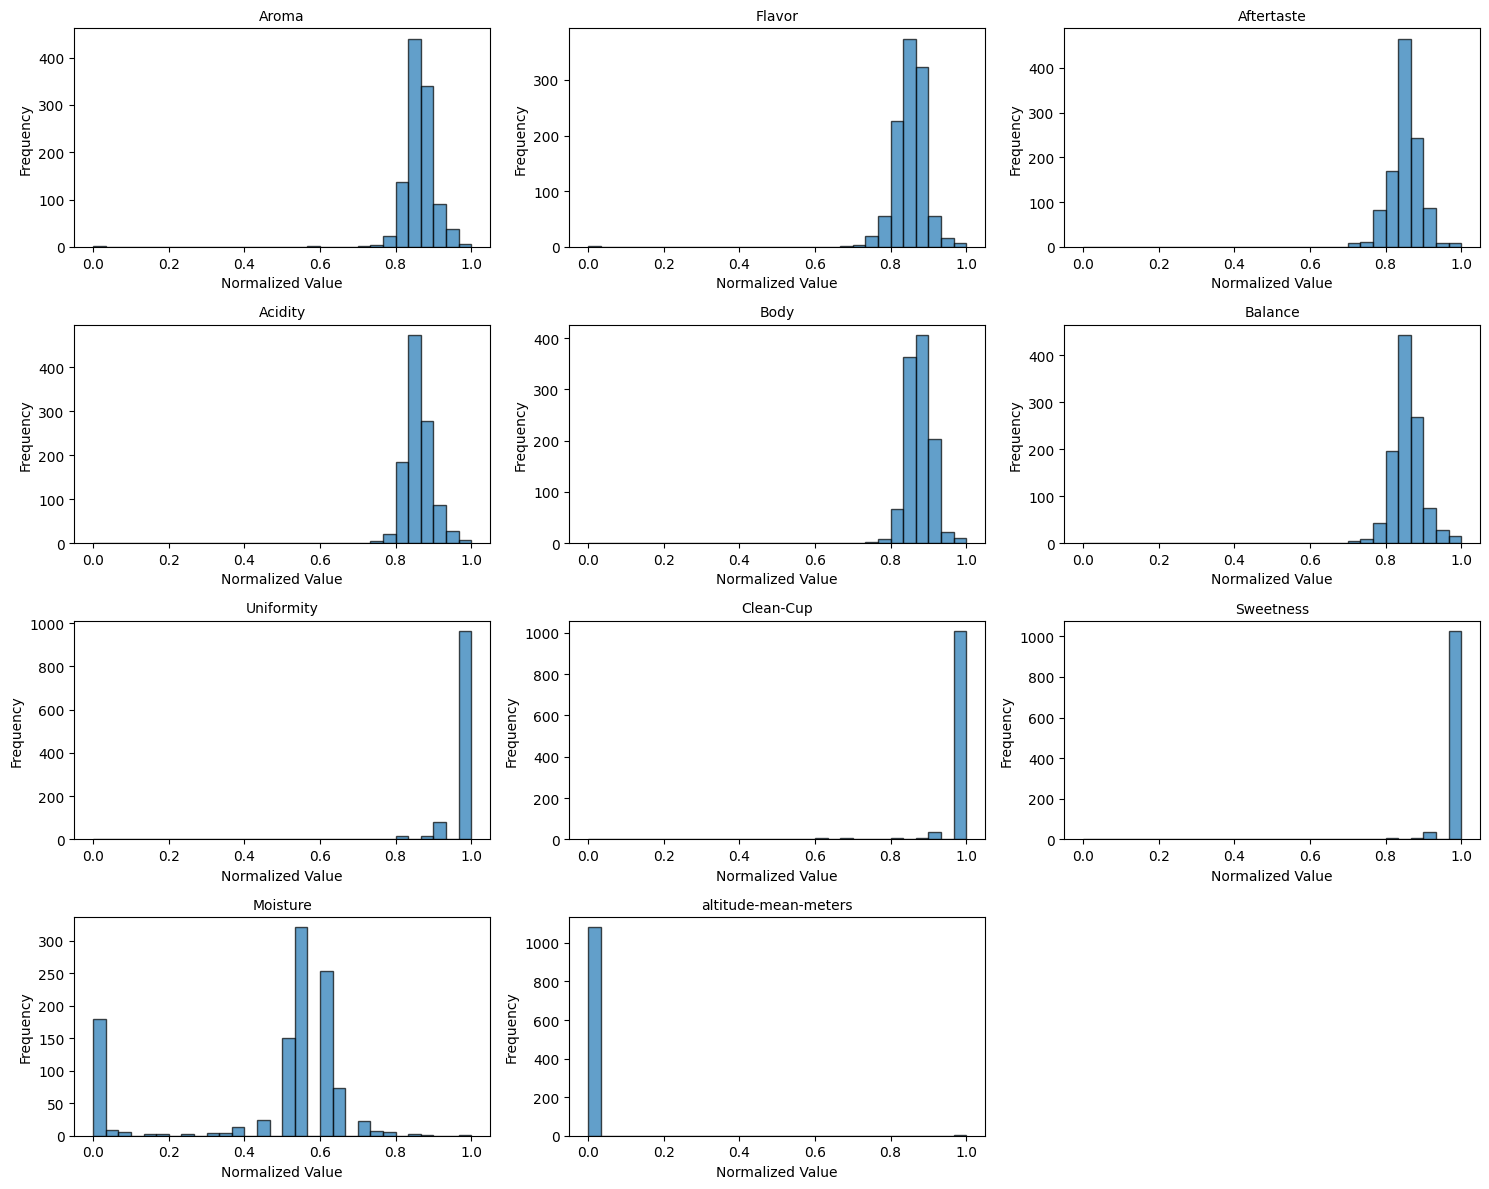

In [27]:
# Create histograms for all attributes
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.flatten()
    
for i, col in enumerate(data.columns):
    axes[i].hist(data[col], bins=30, edgecolor='black', alpha=0.7)
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel('Normalized Value')
    axes[i].set_ylabel('Frequency')
    
# Hide unused subplot
    axes[-1].axis('off')
plt.tight_layout()
plt.show()
    


## 10. Create Metadata File

The metadata file describes each attribute (channel) and its type. This is required by the FCG-Editor experiment system.

In [18]:
def create_metadata(df):
    """
    Create metadata describing each attribute in the dataset.
    
    Args:
        df: pandas DataFrame
    
    Returns:
        DataFrame with columns: channel, type, symbolic-attribute
    """
    metadata = []
    for column in df.columns:
        # Determine if attribute is continuous or categorical
        if pd.api.types.is_numeric_dtype(df[column]):
            attr_type = 'continuous'
        else:
            attr_type = 'categorical'
        
        metadata.append({
            'channel': column,
            'type': attr_type,
            'symbolic-attribute': 'nil'
        })
    
    return pd.DataFrame(metadata)

In [19]:
# Create metadata
meta = create_metadata(data)

print("Metadata created:")
print(meta)

Metadata created:
                 channel        type symbolic-attribute
0                  Aroma  continuous                nil
1                 Flavor  continuous                nil
2             Aftertaste  continuous                nil
3                Acidity  continuous                nil
4                   Body  continuous                nil
5                Balance  continuous                nil
6             Uniformity  continuous                nil
7              Clean-Cup  continuous                nil
8              Sweetness  continuous                nil
9               Moisture  continuous                nil
10  altitude-mean-meters  continuous                nil


## 11. Export Processed Data

Save the processed data and metadata to CSV files for the concept learning experiment.

In [21]:
# Save processed data
data.to_csv(f"{DATASET_NAME}.csv", index=False)
print(f" Saved {DATASET_NAME}.csv")
print(f"  - {len(data)} coffee samples")
print(f"  - {len(data.columns)} attributes")

# Save metadata
meta.to_csv(f"{DATASET_NAME}_meta.csv", index=False)
print(f"\n Saved {DATASET_NAME}_meta.csv")

 Saved coffee.csv
  - 1084 coffee samples
  - 11 attributes

 Saved coffee_meta.csv
